## Patient Readmission Prediction 

In [1]:
import pandas as pd

patient_data = pd.read_csv("diabetic_data.csv")

patient_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
patient_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
# check the missing values for each column

missing_percent = patient_data.isnull().mean()*100
missing_cols = missing_percent[missing_percent>0]
print("Columns with missing values (%):\n", missing_cols)

Columns with missing values (%):
 max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64


In [5]:
duplicates = patient_data.duplicated().sum()
print(f'Duplicate records:{duplicates}')

Duplicate records:0


### as we have some missing values 

In [6]:
import numpy as np

# Replace "?" with NaN for entire dataset

patient_data.replace('?', np.nan, inplace = True)

In [7]:
# Checking for updated missing values

missing_after_replace = patient_data.isnull().mean()*100
missing_values_percent = missing_after_replace[missing_after_replace > 0].sort_values(ascending = False)
print(missing_values_percent)

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64


In [8]:
threshold = 50 # Drop columns with >50% missing values 
cols_to_drop = missing_after_replace[missing_after_replace > threshold].index
patient_data.drop(columns=cols_to_drop, inplace = True)

print(f'Dropped columns: {list(cols_to_drop)}')

Dropped columns: ['weight', 'max_glu_serum', 'A1Cresult']


In [9]:
irrelevant_cols = ['encounter_id', 'patient_nbr', 'payer_code', 'medical_speciality']
patient_data.drop(columns = irrelevant_cols, inplace = True, errors = 'ignore')

print(f'Dropped irrelevant columns: {irrelevant_cols}')

Dropped irrelevant columns: ['encounter_id', 'patient_nbr', 'payer_code', 'medical_speciality']


In [10]:
# Create binary target variable for readmission within 30days
patient_data['readmitted_within_30_days'] = patient_data['readmitted'].apply(lambda x:1 if x == '<30' else 0)

# Drop original readmitted column if no longer needed

patient_data.drop(columns=['readmitted'], inplace = True)

In [11]:
print(patient_data.head())
print(patient_data.shape)

              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

          medical_specialty  num_lab_procedures  num_procedures  ...  \
0  Pediatrics-Endocrinology                  41               0  ...   
1                       NaN                  59               0  ...   
2             

## Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


### Visualize Age Distribution

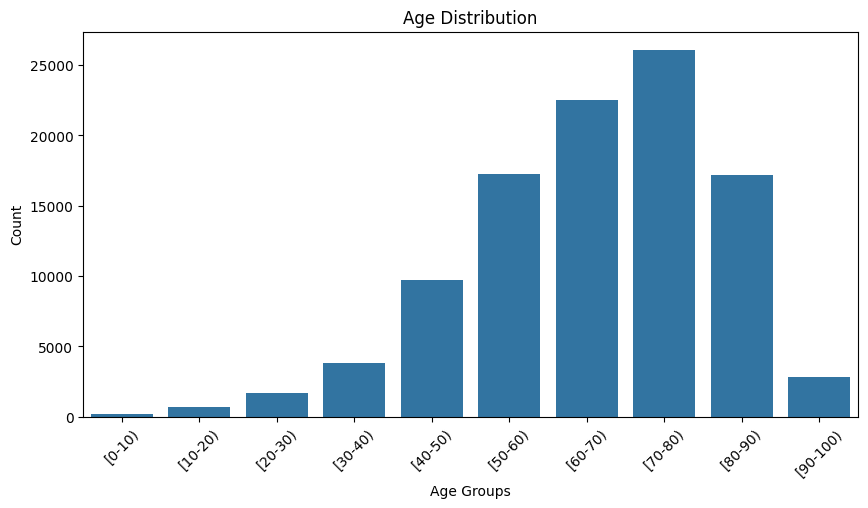

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='age', data = patient_data, order=sorted(patient_data['age'].unique()))
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

1. Most patients are between ages 60-80.
2. This indicates the patient population is primarily elderly.

### Race Distribution

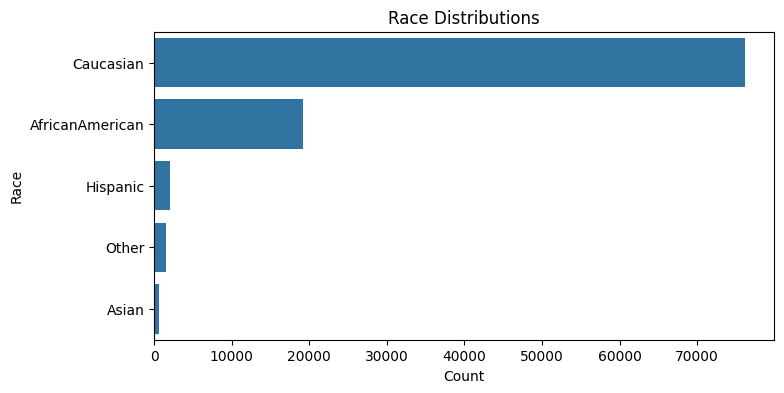

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(y = 'race', data= patient_data, order = patient_data['race'].value_counts().index)
plt.title('Race Distributions')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

1. Majority are caucasian, followed by African American.

### Gender Distribution

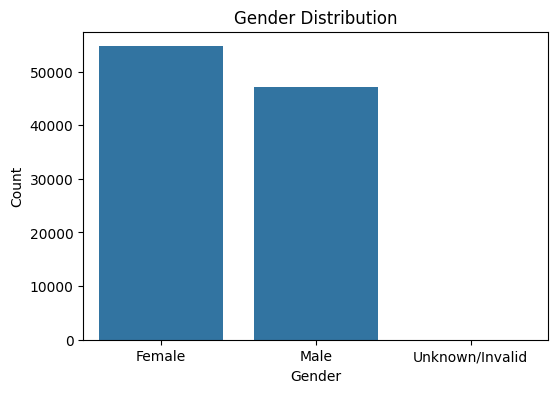

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'gender', data = patient_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

1. Slightly more female patients compared  to males.
2. Gender distribution is enough for modeling.

### Readmission within 30 days(Target) Distribution

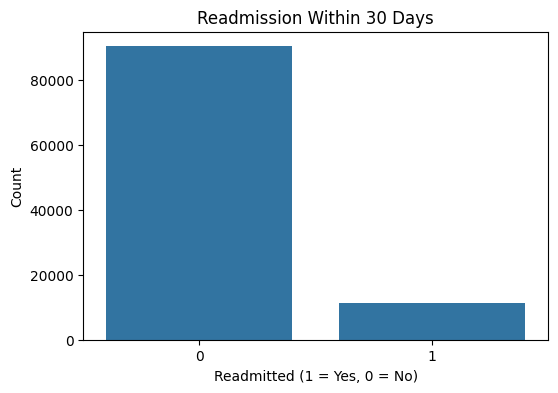

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted_within_30_days', data = patient_data)
plt.title('Readmission Within 30 Days')
plt.xlabel('Readmitted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

1. Clear class imbalance: majority of patients are not readmitted.

### Distribution of Time in Hospital

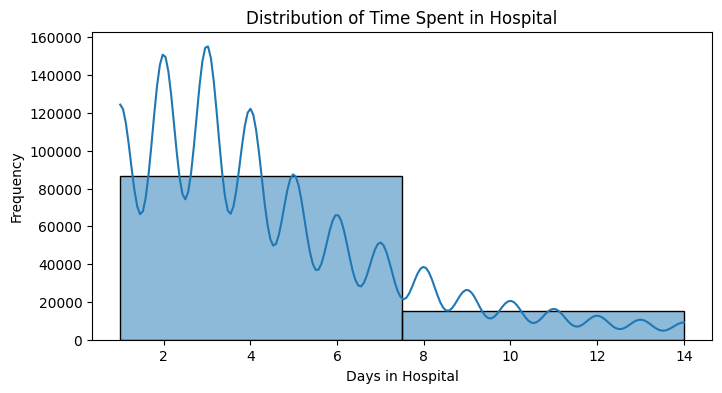

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(patient_data['time_in_hospital'], bins = 2, kde = True)
plt.title('Distribution of Time Spent in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

1. Most patients stay between 1 to 5 days, skewed towards hospital stays.

### Correlation Heatmap (Numerical Features)

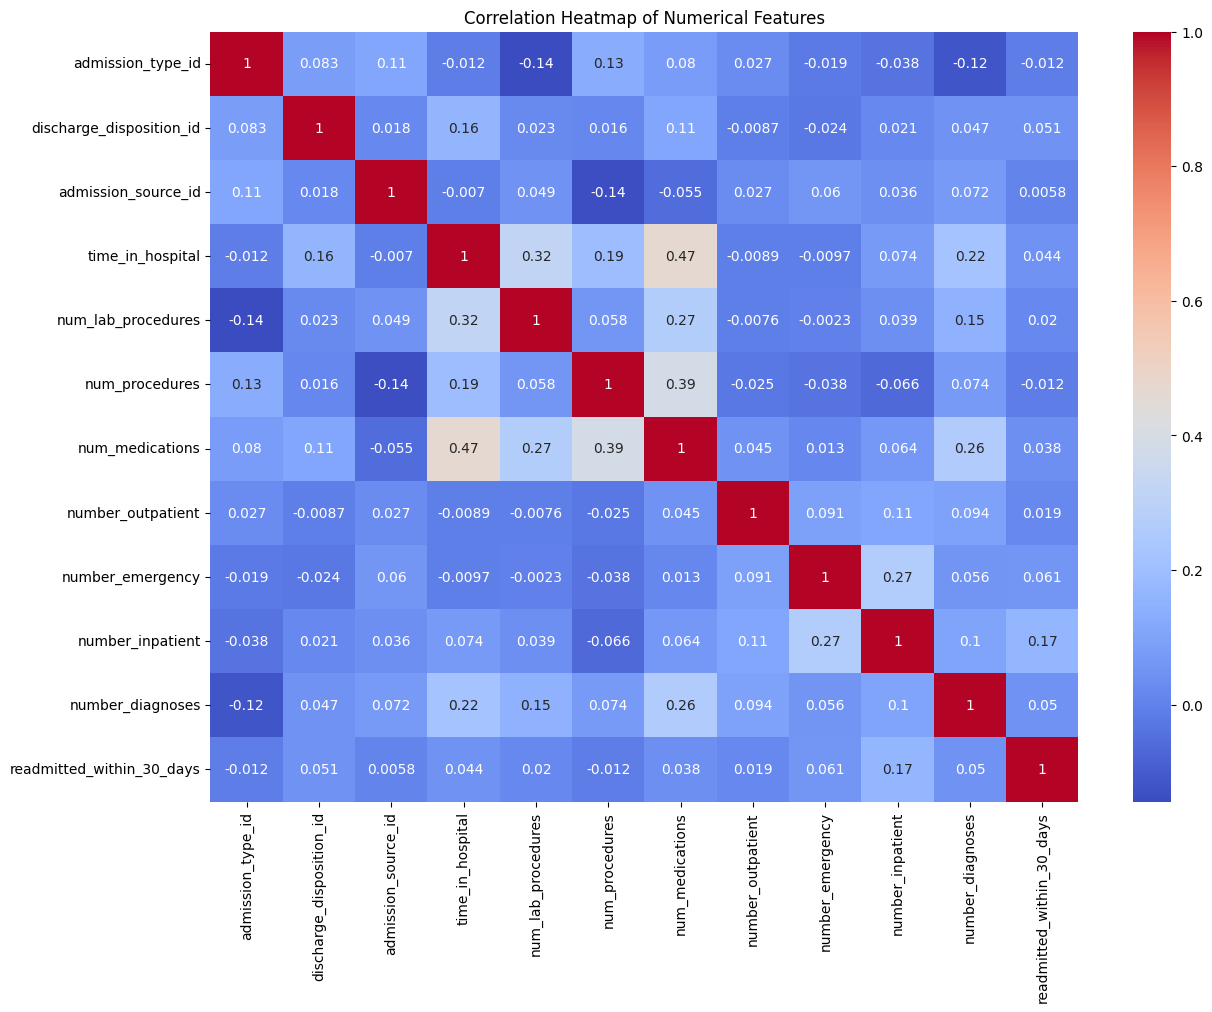

In [21]:
numerical_cols = patient_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14,10))
sns.heatmap(patient_data[numerical_cols].corr(), annot = True , cmap ='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Encoding Categorical Variables

In [ ]:
# Categorical Columns
categorical_cols = patient_data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [29]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(patient_data, columns = categorical_cols, drop_first = True)

print(data_encoded.head())

print(data_encoded.shape)

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ...  insulin_Up  \
0                  0                 0 

### Scaling Numerical features 

In [30]:
from sklearn.preprocessing import StandardScaler 

numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
                  'number_inpatient', 'number_diagnoses']

scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

print(data_encoded.head())

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.137649           -0.106517       -0.785398        -1.848268   
1         -0.467653            0.808384       -0.785398         0.243390   
2         -0.802651           -1.631351        2.145781        -0.371804   
3         -0.802651            0.045967       -0.199162        -0.002688   
4         -1.137649            0.401761       -0.785398        -0.986997   

   number_outpatient  number_emergency  number_inpatient  ...  insulin_Up  \
0          -0.291461          -0.21262 

### Splitting Data for Modeling

In [34]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('readmitted_within_30_days', axis=1)
y = data_encoded['readmitted_within_30_days']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Train Shape: ", X_train.shape)
print("Test shape:", X_test.shape)


Train Shape:  (81412, 2397)
Test shape: (20354, 2397)


## Model Building

### Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train model
lr = LogisticRegression(max_iter = 5000, solver ='saga', class_weight='balanced', random_state =42, n_jobs=-1)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.66      0.77     18083
           1       0.17      0.55      0.26      2271

    accuracy                           0.65     20354
   macro avg       0.54      0.60      0.51     20354
weighted avg       0.84      0.65      0.71     20354

Confusion Matrix:
 [[11875  6208]
 [ 1017  1254]]
ROC-AUC Score: 0.6453609515670111


### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight= 'balanced', random_state=42, n_jobs =-1)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.60      0.00      0.01      2271

    accuracy                           0.89     20354
   macro avg       0.74      0.50      0.47     20354
weighted avg       0.86      0.89      0.84     20354

Random Forest Confusion Matrix:
 [[18077     6]
 [ 2262     9]]
Random Forest ROC-AUC Score: 0.6460173017452451
